### Importing Libraries, Loading Data & Basic EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_excel("DA -Task 2..xlsx")
df.head()

,VIN,TRANSACTION_ID,CORRECTION_VERBATIM,CUSTOMER_VERBATIM,REPAIR_DATE,CAUSAL_PART_NM,GLOBAL_LABOR_CODE_DESCRIPTION,PLATFORM,BODY_STYLE,VPPC,PLANT,BUILD_COUNTRY,LAST_KNOWN_DLR_NAME,LAST_KNOWN_DLR_CITY,REPAIRING_DEALER_CODE,DEALER_NAME,REPAIR_DLR_CITY,STATE,DEALER_REGION,REPAIR_DLR_POSTAL_CD,REPAIR_AGE,KM,COMPLAINT_CD_CSI,COMPLAINT_CD,VEH_TEST_GRP,COUNTRY_SALE_ISO,ORD_SELLING_SRC_CD,OPTN_FAMLY_CERTIFICATION,OPTF_FAMLY_EMISSIOF_SYSTEM,GLOBAL_LABOR_CODE,TRANSACTION_CATEGORY,CAMPAIGN_NBR,REPORTING_COST,TOTALCOST,LBRCOST,ENGINE,ENGINE_DESC,TRANSMISSION,TRANSMISSION_DESC,ENGINE_SOURCE_PLANT,ENGINE_TRACE_NBR,TRANSMISSION_SOURCE_PLANT,TRANSMISSION_TRACE_NBR,SRC_TXN_ID,SRC_VER_NBR,TRANSACTION_CNTR,MEDIA_FLAG,VIN_MODL_DESGTR,LINE_SERIES,LAST_KNOWN_DELVRY_TYPE_CD,NON_CAUSAL_PART_QTY,SALES_REGION_CODE
0,3HCFDDE89SH220903,13021,REPLACED STEERING WHEEL NOW OKAY,STEERING WHEEL COMING APART,2024-01-02,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CCF,SIL,MX,Silverstone Motors,ST JOHNS,13-13992/309484,Apex Auto Sales,ST JOHNS,MI,1,488799101,6,8872,0,0-0310,T03.0354,US,13,FE9,FTB,130,FREG,NaN,370.03,370.03,61.46,LZ0,"DIESEL, 6 CYL, 3.0L, CRI, L6, DOHC, TURBO, VGT...",MQC,"BYT 10 SPD, 10L80, ATSS, ETRS, CPA, GEN 2",70628511,V2210281MFTX0488,287827.0,S2210121CNJX0941,2808908219,6,1,N,CF10543,1500,21.0,0,1
1,1HRFFEE8XSZ230636,13028,CHECKED - FOUND DTC'S U0229 - U1530 SET IN BCM...,CUSTOMER STATES HEATED STEERING WHEEL INOP,2024-01-03,MODULE ASM-STRG WHL HT CONT,Heated Steering Wheel Module Replacement,Full-Size Trucks,Crew Cab,T1CGF,FTW,US,Elite Auto Group,FISHERS,13-14819/243038,SilverPeak Motors,GRAND RAPIDS,MN,1,557444215,5,16346,0,0-0310,T03.0354,US,48,FE9,FTB,2400,FREG,NaN,307.32,307.32,291.14,LZ0,"DIESEL, 6 CYL, 3.0L, CRI, L6, DOHC, TURBO, VGT...",MQC,"BYT 10 SPD, 10L80, ATSS, ETRS, CPA, GEN 2",70628511,V2210291MFTX0188,17749294.0,R2210881CNJX0287,2808841910,6,1,Y,TF10543,1500,10.0,0,1
2,1HYKSMRK6SZ000990,13035,APPROVED 4.9(OLH) FOR ADDED DIAGNOSTICS WITH T...,OWNER REPORTS: THE SUPER CRUISE BAR ON THE STE...,2024-01-04,WHEEL ASM-STRG *BACKEN BLACKK,Steering Wheel Replacement,BEV,4 Door Utility,L233-LSOP,SHT,US,CrossRoads Dealership,SAN DIEGO,11-46466/119152,Quantum Car Traders,SAN DIEGO,CA,1,921083521,9,8887,0,0-0310,T00.0006,US,12,YF5,FF6,130,FREG,NaN,2457.45,3205.45,1012.67,EN0,NONE,MF1,NONE,NaN,NaN,NaN,NaN,2809979441,4,1,Y,6MB26,Lux-1,10.0,0,1
3,3HCFDFEL3SH241701,13021,STEERING WHEEL REPLACEMENT,CUSTOMER STATES THE LETTERING AND FINISH ON TH...,2024-01-04,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CCF,NaN,MX,Westwood Wheels,MILWAUKEE,13-47099/113361,Summit Drive Auto,SLINGER,WI,1,530869027,10,15500,0,0-0890,T06.2375,US,13,FE9,FTB,130,FREG,NaN,445.28,445.28,63.18,L87,"GAS, 8 CYL, V8, 6.2L, DI, DFM, ALUM, GEN 5",MHS,"BYT 10 SPD, 10L80, GRX, GEN 1, ATSS, ETRS, VAR 1",830107152,N2210821MFYX0482,287827.0,S1210822CKJX0291,2808892288,6,1,Y,CF10543,1500,10.0,0,1
4,1HRFFHEL1RZ181474,13021,REPLACED STEERING MESSAGE NO LONGER DISPLAYED,C/S: CUSTOMER STATES THE SERVICE DRIVER ASSIST...,2024-01-05,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CGF,FTW,US,LuxeAuto Sales,KELLOGG,11-47556/116725,Horizon Motors,LIBERTY LAKE,WA,1,990197623,0,8,0,0-0621,T06.2375,US,48,NE1,FUC,130,FREG,NaN,1439.65,1439.65,136.00,L87,"GAS, 8 CYL, V8, 6.2L, DI, DFM, ALUM, GEN 5",MHS,"BYT 10 SPD, 10L80, GRX, GEN 1, ATSS, ETRS, VAR 1",830107152,N2212994MGPX0790,17749294.0,R2212982CKJX0282,2808901882,8,1,N,TF10543,1500,10.0,0,1


In [3]:
df.shape

(100, 52)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 52 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   VIN                            100 non-null    object        
 1   TRANSACTION_ID                 100 non-null    int64         
 2   CORRECTION_VERBATIM            100 non-null    object        
 3   CUSTOMER_VERBATIM              100 non-null    object        
 4   REPAIR_DATE                    100 non-null    datetime64[ns]
 5   CAUSAL_PART_NM                 95 non-null     object        
 6   GLOBAL_LABOR_CODE_DESCRIPTION  100 non-null    object        
 7   PLATFORM                       100 non-null    object        
 8   BODY_STYLE                     100 non-null    object        
 9   VPPC                           100 non-null    object        
 10  PLANT                          99 non-null     object        
 11  BUILD_COUNTRY       

In [5]:
df.isna().sum()

VIN                                0
TRANSACTION_ID                     0
CORRECTION_VERBATIM                0
CUSTOMER_VERBATIM                  0
REPAIR_DATE                        0
CAUSAL_PART_NM                     5
GLOBAL_LABOR_CODE_DESCRIPTION      0
PLATFORM                           0
BODY_STYLE                         0
VPPC                               0
PLANT                              1
BUILD_COUNTRY                      0
LAST_KNOWN_DLR_NAME                0
LAST_KNOWN_DLR_CITY                0
REPAIRING_DEALER_CODE              0
DEALER_NAME                        0
REPAIR_DLR_CITY                    0
STATE                              2
DEALER_REGION                      0
REPAIR_DLR_POSTAL_CD               2
REPAIR_AGE                         0
KM                                 0
COMPLAINT_CD_CSI                   0
COMPLAINT_CD                       0
VEH_TEST_GRP                       2
COUNTRY_SALE_ISO                   0
ORD_SELLING_SRC_CD                 0
O

In [6]:
df.duplicated().sum()    # No duplicates found

np.int64(0)

In [7]:
for col in df.columns:
    print(f"{col} :", df[col].nunique())

VIN : 98
TRANSACTION_ID : 32
CORRECTION_VERBATIM : 93
CUSTOMER_VERBATIM : 100
REPAIR_DATE : 29
CAUSAL_PART_NM : 18
GLOBAL_LABOR_CODE_DESCRIPTION : 4
PLATFORM : 11
BODY_STYLE : 6
VPPC : 26
PLANT : 11
BUILD_COUNTRY : 3
LAST_KNOWN_DLR_NAME : 100
LAST_KNOWN_DLR_CITY : 94
REPAIRING_DEALER_CODE : 95
DEALER_NAME : 100
REPAIR_DLR_CITY : 93
STATE : 39
DEALER_REGION : 2
REPAIR_DLR_POSTAL_CD : 92
REPAIR_AGE : 35
KM : 100
COMPLAINT_CD_CSI : 1
COMPLAINT_CD : 7
VEH_TEST_GRP : 23
COUNTRY_SALE_ISO : 6
ORD_SELLING_SRC_CD : 7
OPTN_FAMLY_CERTIFICATION : 3
OPTF_FAMLY_EMISSIOF_SYSTEM : 8
GLOBAL_LABOR_CODE : 4
TRANSACTION_CATEGORY : 2
CAMPAIGN_NBR : 0
REPORTING_COST : 100
TOTALCOST : 94
LBRCOST : 99
ENGINE : 12
ENGINE_DESC : 12
TRANSMISSION : 19
TRANSMISSION_DESC : 20
ENGINE_SOURCE_PLANT : 9
ENGINE_TRACE_NBR : 88
TRANSMISSION_SOURCE_PLANT : 6
TRANSMISSION_TRACE_NBR : 88
SRC_TXN_ID : 100
SRC_VER_NBR : 10
TRANSACTION_CNTR : 1
MEDIA_FLAG : 2
VIN_MODL_DESGTR : 41
LINE_SERIES : 22
LAST_KNOWN_DELVRY_TYPE_CD : 11


### Data Cleaning 
1. Dropping col "CAMPAIGN_NBR" as it has all missing Values
2. Updating the column names for "OPTF_FAMLY_EMISSIOF_SYSTEM", "TOTALCOST", "LBRCOST".
3. Updating the Data types of Columns

In [8]:
df.drop("CAMPAIGN_NBR", axis = 1, inplace = True)
df.rename(columns = {"OPTF_FAMLY_EMISSIOF_SYSTEM" : "OPTN_FAMLY_EMISSION_SYSTEM", "TOTALCOST" : "TOTAL_COST", "LBRCOST" : "LABOUR_COST"}, inplace = True)
df.columns

Index(['VIN', 'TRANSACTION_ID', 'CORRECTION_VERBATIM', 'CUSTOMER_VERBATIM',
       'REPAIR_DATE', 'CAUSAL_PART_NM', 'GLOBAL_LABOR_CODE_DESCRIPTION',
       'PLATFORM', 'BODY_STYLE', 'VPPC', 'PLANT', 'BUILD_COUNTRY',
       'LAST_KNOWN_DLR_NAME', 'LAST_KNOWN_DLR_CITY', 'REPAIRING_DEALER_CODE',
       'DEALER_NAME', 'REPAIR_DLR_CITY', 'STATE', 'DEALER_REGION',
       'REPAIR_DLR_POSTAL_CD', 'REPAIR_AGE', 'KM', 'COMPLAINT_CD_CSI',
       'COMPLAINT_CD', 'VEH_TEST_GRP', 'COUNTRY_SALE_ISO',
       'ORD_SELLING_SRC_CD', 'OPTN_FAMLY_CERTIFICATION',
       'OPTN_FAMLY_EMISSION_SYSTEM', 'GLOBAL_LABOR_CODE',
       'TRANSACTION_CATEGORY', 'REPORTING_COST', 'TOTAL_COST', 'LABOUR_COST',
       'ENGINE', 'ENGINE_DESC', 'TRANSMISSION', 'TRANSMISSION_DESC',
       'ENGINE_SOURCE_PLANT', 'ENGINE_TRACE_NBR', 'TRANSMISSION_SOURCE_PLANT',
       'TRANSMISSION_TRACE_NBR', 'SRC_TXN_ID', 'SRC_VER_NBR',
       'TRANSACTION_CNTR', 'MEDIA_FLAG', 'VIN_MODL_DESGTR', 'LINE_SERIES',
       'LAST_KNOWN_DELVRY_TYPE_

In [9]:
missing_cols = df.columns[df.isna().any()].tolist()
missing_cols

['CAUSAL_PART_NM',
 'PLANT',
 'STATE',
 'REPAIR_DLR_POSTAL_CD',
 'VEH_TEST_GRP',
 'OPTN_FAMLY_CERTIFICATION',
 'OPTN_FAMLY_EMISSION_SYSTEM',
 'TOTAL_COST',
 'ENGINE_SOURCE_PLANT',
 'ENGINE_TRACE_NBR',
 'TRANSMISSION_SOURCE_PLANT',
 'TRANSMISSION_TRACE_NBR',
 'LINE_SERIES',
 'LAST_KNOWN_DELVRY_TYPE_CD']

In [10]:
df[missing_cols].dtypes     

CAUSAL_PART_NM                 object
PLANT                          object
STATE                          object
REPAIR_DLR_POSTAL_CD           object
VEH_TEST_GRP                   object
OPTN_FAMLY_CERTIFICATION       object
OPTN_FAMLY_EMISSION_SYSTEM     object
TOTAL_COST                    float64
ENGINE_SOURCE_PLANT            object
ENGINE_TRACE_NBR               object
TRANSMISSION_SOURCE_PLANT     float64
TRANSMISSION_TRACE_NBR         object
LINE_SERIES                    object
LAST_KNOWN_DELVRY_TYPE_CD     float64
dtype: object

Out of 14 columns with missing values, 3 are of numeric data type while others are of Object data type. We can replace the null values for Object data types with "others" and for the numerical. Cols "LAST_KNOWN_DELVRY_TYPE_CD" and "TRANSMISSION_SOURCE_PLANT" look like categorical cols. Although we should change the data type of other categorical columns to category as well but for the time being let it stay as it is

In [11]:
df[["TRANSMISSION_SOURCE_PLANT", "LAST_KNOWN_DELVRY_TYPE_CD"]] = df[["TRANSMISSION_SOURCE_PLANT", "LAST_KNOWN_DELVRY_TYPE_CD"]].astype("object")

In [12]:
for col in df[missing_cols].select_dtypes(include=['object']).columns:
    df[col].fillna("OTHERS", inplace=True)

In [13]:
# Handling missing values int the Total Cost column in the dataframe, lets compare that with other cost columns

df[['REPORTING_COST', 'TOTAL_COST', 'LABOUR_COST']]


,REPORTING_COST,TOTAL_COST,LABOUR_COST
0,370.03,370.03,61.46
1,307.32,307.32,291.14
2,2457.45,3205.45,1012.67
3,445.28,445.28,63.18
4,1439.65,1439.65,136.00
...,...,...,...
95,718.53,1026.53,59.88
96,1474.06,1474.06,118.90
97,481.95,481.95,86.57
98,101.85,101.85,101.85


In most of the cases the values for reporting cost and total cost are the same, lets impute the missing values from reporting cost

In [14]:
df['TOTAL_COST'] = df['TOTAL_COST'].fillna(df['REPORTING_COST'])
df.isna().sum()

VIN                              0
TRANSACTION_ID                   0
CORRECTION_VERBATIM              0
CUSTOMER_VERBATIM                0
REPAIR_DATE                      0
CAUSAL_PART_NM                   0
GLOBAL_LABOR_CODE_DESCRIPTION    0
PLATFORM                         0
BODY_STYLE                       0
VPPC                             0
PLANT                            0
BUILD_COUNTRY                    0
LAST_KNOWN_DLR_NAME              0
LAST_KNOWN_DLR_CITY              0
REPAIRING_DEALER_CODE            0
DEALER_NAME                      0
REPAIR_DLR_CITY                  0
STATE                            0
DEALER_REGION                    0
REPAIR_DLR_POSTAL_CD             0
REPAIR_AGE                       0
KM                               0
COMPLAINT_CD_CSI                 0
COMPLAINT_CD                     0
VEH_TEST_GRP                     0
COUNTRY_SALE_ISO                 0
ORD_SELLING_SRC_CD               0
OPTN_FAMLY_CERTIFICATION         0
OPTN_FAMLY_EMISSION_

All missing values are thus handled

### Handling Non Numerical Columns

In [15]:
# Standardizing the columns to have all upper case characters

df_object = df.select_dtypes(include=['object'])

df[df_object.columns] = df_object.apply(lambda col: col.str.strip().str.upper())


In [16]:
df_object.head()

,VIN,CORRECTION_VERBATIM,CUSTOMER_VERBATIM,CAUSAL_PART_NM,GLOBAL_LABOR_CODE_DESCRIPTION,PLATFORM,BODY_STYLE,VPPC,PLANT,BUILD_COUNTRY,LAST_KNOWN_DLR_NAME,LAST_KNOWN_DLR_CITY,REPAIRING_DEALER_CODE,DEALER_NAME,REPAIR_DLR_CITY,STATE,REPAIR_DLR_POSTAL_CD,COMPLAINT_CD,VEH_TEST_GRP,COUNTRY_SALE_ISO,OPTN_FAMLY_CERTIFICATION,OPTN_FAMLY_EMISSION_SYSTEM,TRANSACTION_CATEGORY,ENGINE,ENGINE_DESC,TRANSMISSION,TRANSMISSION_DESC,ENGINE_SOURCE_PLANT,ENGINE_TRACE_NBR,TRANSMISSION_SOURCE_PLANT,TRANSMISSION_TRACE_NBR,MEDIA_FLAG,VIN_MODL_DESGTR,LINE_SERIES,LAST_KNOWN_DELVRY_TYPE_CD
0,3HCFDDE89SH220903,REPLACED STEERING WHEEL NOW OKAY,STEERING WHEEL COMING APART,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CCF,SIL,MX,Silverstone Motors,ST JOHNS,13-13992/309484,Apex Auto Sales,ST JOHNS,MI,488799101,0-0310,T03.0354,US,FE9,FTB,FREG,LZ0,"DIESEL, 6 CYL, 3.0L, CRI, L6, DOHC, TURBO, VGT...",MQC,"BYT 10 SPD, 10L80, ATSS, ETRS, CPA, GEN 2",70628511,V2210281MFTX0488,287827.0,S2210121CNJX0941,N,CF10543,1500,21.0
1,1HRFFEE8XSZ230636,CHECKED - FOUND DTC'S U0229 - U1530 SET IN BCM...,CUSTOMER STATES HEATED STEERING WHEEL INOP,MODULE ASM-STRG WHL HT CONT,Heated Steering Wheel Module Replacement,Full-Size Trucks,Crew Cab,T1CGF,FTW,US,Elite Auto Group,FISHERS,13-14819/243038,SilverPeak Motors,GRAND RAPIDS,MN,557444215,0-0310,T03.0354,US,FE9,FTB,FREG,LZ0,"DIESEL, 6 CYL, 3.0L, CRI, L6, DOHC, TURBO, VGT...",MQC,"BYT 10 SPD, 10L80, ATSS, ETRS, CPA, GEN 2",70628511,V2210291MFTX0188,17749294.0,R2210881CNJX0287,Y,TF10543,1500,10.0
2,1HYKSMRK6SZ000990,APPROVED 4.9(OLH) FOR ADDED DIAGNOSTICS WITH T...,OWNER REPORTS: THE SUPER CRUISE BAR ON THE STE...,WHEEL ASM-STRG *BACKEN BLACKK,Steering Wheel Replacement,BEV,4 Door Utility,L233-LSOP,SHT,US,CrossRoads Dealership,SAN DIEGO,11-46466/119152,Quantum Car Traders,SAN DIEGO,CA,921083521,0-0310,T00.0006,US,YF5,FF6,FREG,EN0,NONE,MF1,NONE,OTHERS,OTHERS,OTHERS,OTHERS,Y,6MB26,Lux-1,10.0
3,3HCFDFEL3SH241701,STEERING WHEEL REPLACEMENT,CUSTOMER STATES THE LETTERING AND FINISH ON TH...,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CCF,OTHERS,MX,Westwood Wheels,MILWAUKEE,13-47099/113361,Summit Drive Auto,SLINGER,WI,530869027,0-0890,T06.2375,US,FE9,FTB,FREG,L87,"GAS, 8 CYL, V8, 6.2L, DI, DFM, ALUM, GEN 5",MHS,"BYT 10 SPD, 10L80, GRX, GEN 1, ATSS, ETRS, VAR 1",830107152,N2210821MFYX0482,287827.0,S1210822CKJX0291,Y,CF10543,1500,10.0
4,1HRFFHEL1RZ181474,REPLACED STEERING MESSAGE NO LONGER DISPLAYED,C/S: CUSTOMER STATES THE SERVICE DRIVER ASSIST...,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CGF,FTW,US,LuxeAuto Sales,KELLOGG,11-47556/116725,Horizon Motors,LIBERTY LAKE,WA,990197623,0-0621,T06.2375,US,NE1,FUC,FREG,L87,"GAS, 8 CYL, V8, 6.2L, DI, DFM, ALUM, GEN 5",MHS,"BYT 10 SPD, 10L80, GRX, GEN 1, ATSS, ETRS, VAR 1",830107152,N2212994MGPX0790,17749294.0,R2212982CKJX0282,N,TF10543,1500,10.0


### Saving the Cleaned Dataset

In [17]:
df.to_csv("task2_cleaned.csv")

### Selection of Critical Columns for StakeHolders

Top 5 critical columns would be 
1. 'TRANSACTION_ID' : For finding details about each unique transaction.
2. 'REPAIR_DATE' : To determine the particular dates on which the repairs were done.
3. 'GLOBAL_LABOR_CODE_DESCRIPTION' : To find the types of repair cases handled.
4. 'PLATFORM' : To determine the types of incoming platforms.
5. 'TOTAL_COST' : Provides an insight into the revenue.

In [18]:
transactions_grouped = df.groupby(['TRANSACTION_ID'])\
    .agg({'TOTAL_COST': 'sum', 'TRANSACTION_ID': 'count'})\
    .rename(columns = {"TOTAL_COST" : "TOTAL_COST_PER_TRANSACTION", "TRANSACTION_ID" : "NO_OF_TRANSACTIONS"})

transactions_grouped.head()

,TOTAL_COST_PER_TRANSACTION,NO_OF_TRANSACTIONS
TRANSACTION_ID,,
13021,2709.73,5
13023,539.26,2
13024,307.15,2
13025,5617.58,10
13026,1210.16,4


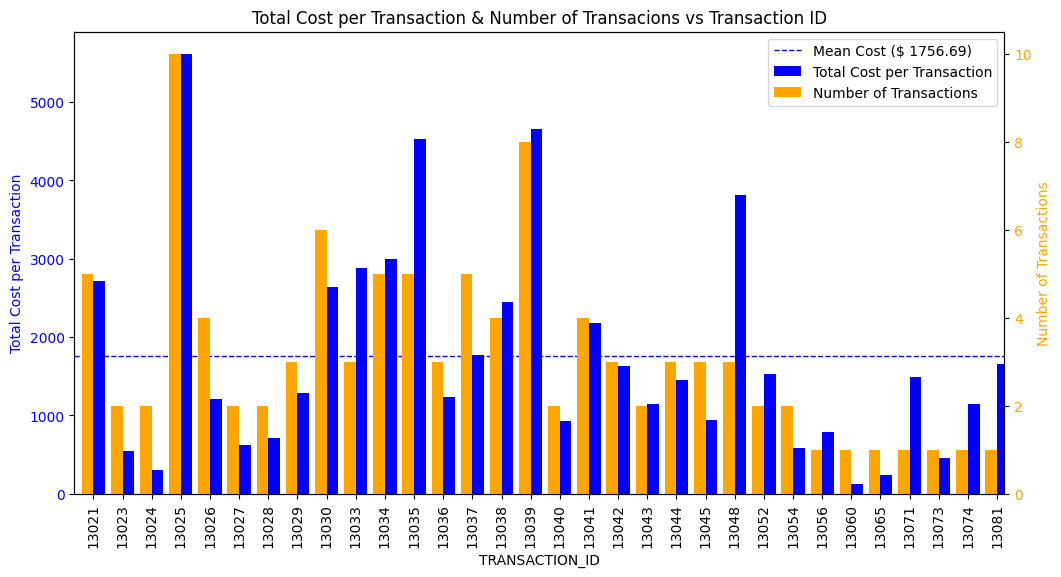

In [29]:
fig, ax1 = plt.subplots(figsize=(12, 6))

transactions_grouped['TOTAL_COST_PER_TRANSACTION'].plot(kind='bar', color='blue', ax=ax1, width=0.4, position=0, label='Total Cost per Transaction')
ax1.set_ylabel('Total Cost per Transaction', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

mean_cost = transactions_grouped['TOTAL_COST_PER_TRANSACTION'].mean()
ax1.axhline(mean_cost, color='blue', linestyle='--', linewidth=1, label=f'Mean Cost ($ {mean_cost:.2f})')

ax2 = ax1.twinx()
transactions_grouped['NO_OF_TRANSACTIONS'].plot(kind='bar', color='orange', ax=ax2, width=0.4, position=1, label='Number of Transactions')
ax2.set_ylabel('Number of Transactions', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

handles_ax1, labels_ax1 = ax1.get_legend_handles_labels()
handles_ax2, labels_ax2 = ax2.get_legend_handles_labels()
handles = handles_ax1 + handles_ax2
labels = labels_ax1 + labels_ax2

ax1.legend(handles, labels, loc='upper right', bbox_to_anchor=(1, 1))

plt.title('Total Cost per Transaction & Number of Transacions vs Transaction ID')
plt.show()

In [20]:
transactions_by_day = df.groupby(['REPAIR_DATE'])\
    .agg({'TOTAL_COST' : 'sum'})\
    .sort_index()\
    .rename(columns={'TOTAL_COST' : 'COST_BY_REPAIR_DAY'})

transactions_by_day.head()

,COST_BY_REPAIR_DAY
REPAIR_DATE,
2024-01-02,370.03
2024-01-03,307.32
2024-01-04,3650.73
2024-01-05,3572.42
2024-01-08,27.69


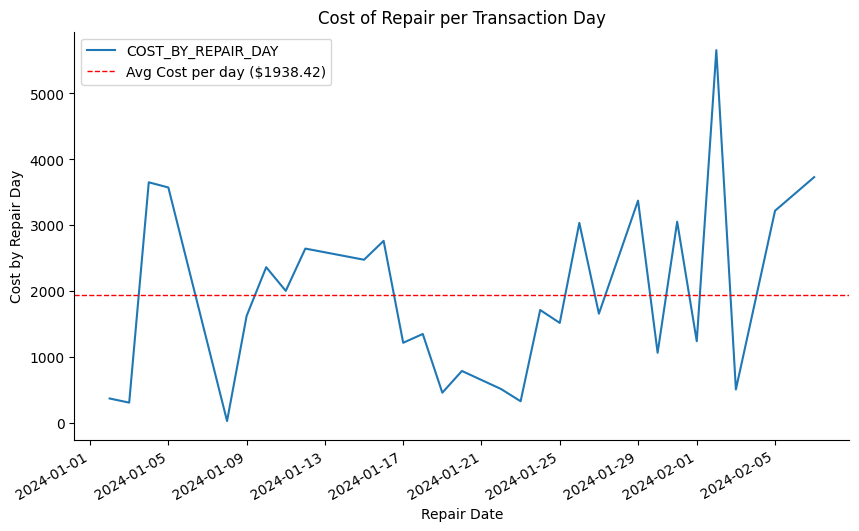

In [21]:
avg_cost = transactions_by_day['COST_BY_REPAIR_DAY'].mean()

transactions_by_day.plot(kind='line', figsize=(10, 6), legend=False)
plt.title('Cost of Repair per Transaction Day')
plt.xlabel('Repair Date')
plt.ylabel('Cost by Repair Day')

plt.axhline(avg_cost, color='red', linestyle='--', linewidth=1, label=f'Avg Cost per day (${avg_cost:.2f})')
plt.legend(loc='upper left')

plt.grid(False)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()

On an average the costs are $ 1938.42, while we see some some dips and spikes reasons for which could be investigated

In [22]:
df_labour_code_desc = df['GLOBAL_LABOR_CODE_DESCRIPTION'].value_counts().reset_index()
df_labour_code_desc

,GLOBAL_LABOR_CODE_DESCRIPTION,count
0,STEERING WHEEL REPLACEMENT,78
1,STEERING WHEEL SPOKE COVER REPLACEMENT,11
2,HEATED STEERING WHEEL MODULE REPLACEMENT,6
3,STEERING WHEEL HORN SWITCH WIRING HARNESS REPL...,5


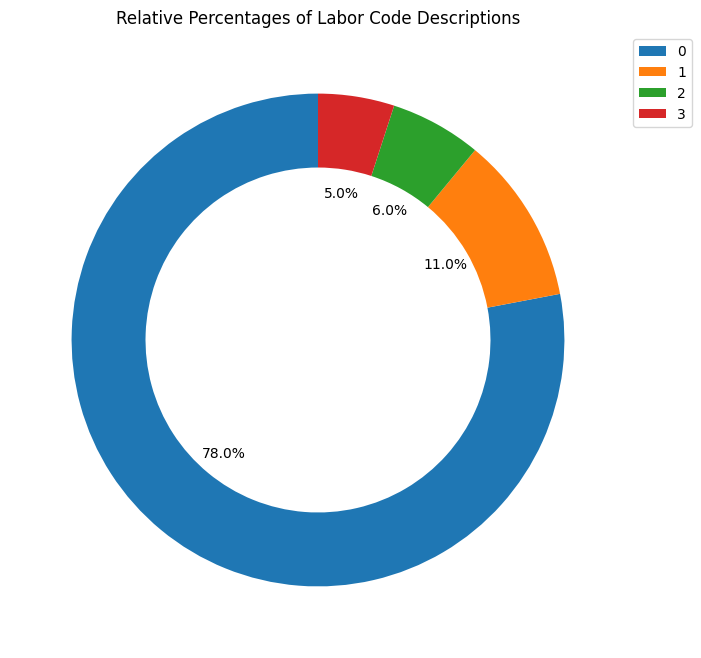

In [23]:
df_labour_code_desc['count'].plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    figsize=(8, 8),
    labels=None,
    wedgeprops={'width': 0.3}
)
plt.title('Relative Percentages of Labor Code Descriptions')
plt.legend(labels=df_labour_code_desc.index, loc='upper left', bbox_to_anchor=(1, 1))
plt.ylabel('')
plt.show()


Approximately 78% of the repairs are for Steering wheel replacements, It's wise to keep more stocks for steering wheels to accommodate the repairs 

In [24]:
df_platform = df['PLATFORM'].value_counts().reset_index()
df_platform

,PLATFORM,count
0,FULL-SIZE TRUCKS,52
1,FULL-SIZE UTILITY,13
2,CROSSOVER SUV,11
3,GLOBAL GAMMA,7
4,GLOBAL CROSSOVER VEHICLES,7
5,BEV,5
6,LUXURY CAR-3,1
7,GLOBAL GAMMA VEHICLES,1
8,GLOBAL EPSILON II,1
9,ALPHA,1


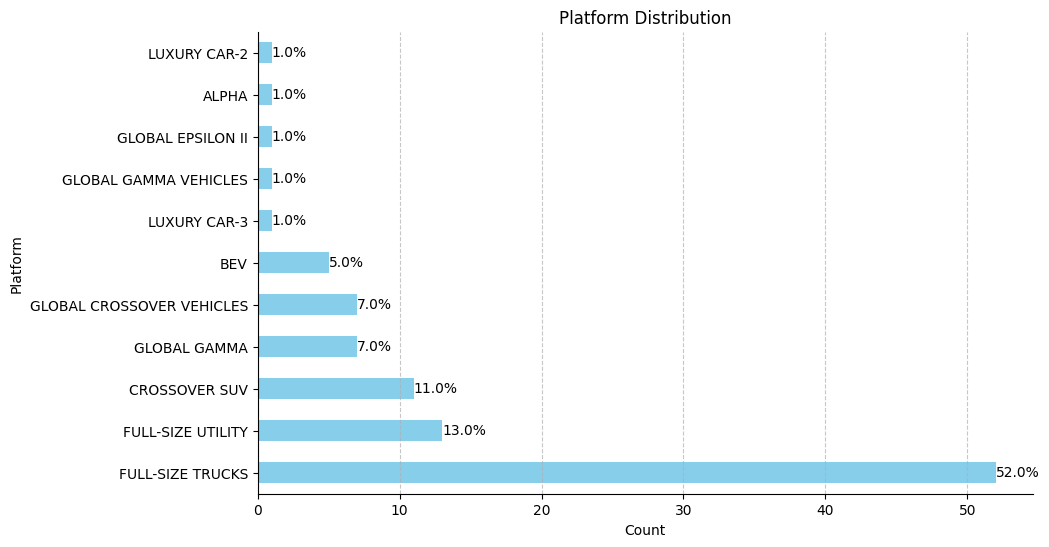

In [25]:
ax = df_platform.plot(
    kind='barh',
    x='PLATFORM',
    y='count',
    figsize=(10, 6),
    color='skyblue',
    legend=False
)

total_count = df_platform['count'].sum()

for index, value in enumerate(df_platform['count']):
    percentage = (value / total_count) * 100
    ax.annotate(f'{percentage:.1f}%', xy=(value, index), va='center', ha='left', fontsize=10, color='black')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.title('Platform Distribution')
plt.xlabel('Count')
plt.ylabel('Platform')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

More than half of the platforms coming for repairs(around 52%) are Full-size Trucks, They would more floor area which could be taken care while opening any new repair shop

In [26]:
avg_cost_by_platform = df.groupby('PLATFORM')\
    .agg({'TOTAL_COST' : 'mean'})\
    .sort_values('TOTAL_COST', ascending = False)\
    .rename(columns = {'TOTAL_COST' : 'AVG_COST'})

avg_cost_by_platform

,AVG_COST
PLATFORM,
BEV,1662.370000
GLOBAL CROSSOVER VEHICLES,828.901429
ALPHA,687.110000
LUXURY CAR-3,562.500000
GLOBAL GAMMA,548.657143
FULL-SIZE UTILITY,531.976923
FULL-SIZE TRUCKS,472.171154
GLOBAL GAMMA VEHICLES,412.410000
LUXURY CAR-2,394.830000


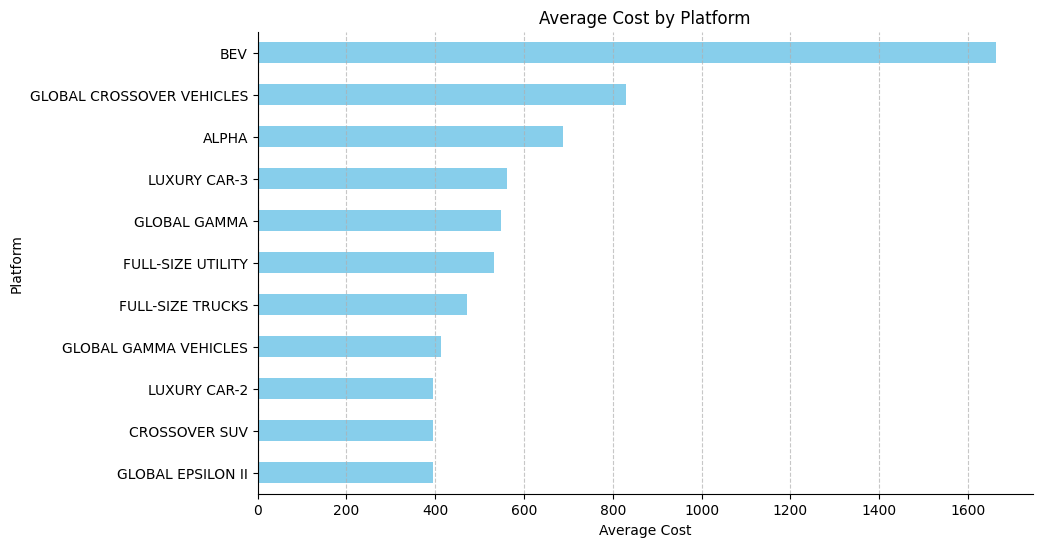

In [27]:
avg_cost_by_platform.sort_values('AVG_COST', ascending=True).plot(
    kind='barh',
    figsize=(10, 6),
    color='skyblue',
    legend=False
)

plt.title('Average Cost by Platform')
plt.xlabel('Average Cost')
plt.ylabel('Platform')
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()

Reparing cost for BEVs is more than twice for any other vehicle, this shows potential opportunities in the BEV segment. It's better to train technicians with these technologies as this is going to boost the revenue